# Simulation Examples

### Getting empirical distributions from the data

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import random
import matplotlib.pyplot as plt

C:\Users\rvicc\anaconda3\envs\test-ai\lib\site-packages\scipy\stats\_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


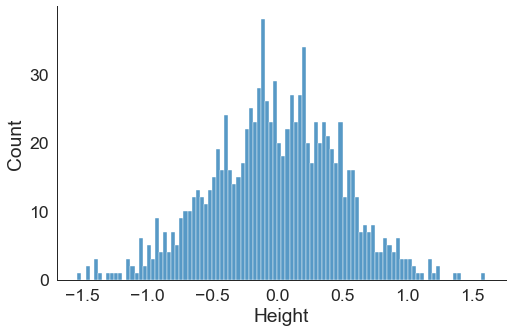

In [35]:
#Generating the Data
data = pd.DataFrame({"Height":np.random.normal(0, 0.5, 1000)})
#Graph of the dataset
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=data, x="Height", kind="hist", bins = 100, aspect = 1.5)
#Extract Data
height = data["Height"].values

C:\Users\rvicc\anaconda3\envs\test-ai\lib\site-packages\scipy\stats\_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


,sumsquare_error,aic,bic,kl_div
norm,0.892688,387.602811,-7007.457763,inf
gamma,0.934671,387.235439,-6954.592708,inf
exponpow,1.309671,439.214938,-6617.255907,inf
cauchy,2.272846,367.349526,-6072.906962,inf
rayleigh,4.605083,279.622010,-5366.779001,inf


C:\Users\rvicc\anaconda3\envs\test-ai\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


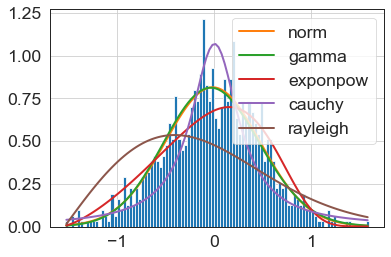

C:\Users\rvicc\anaconda3\envs\test-ai\lib\site-packages\scipy\stats\_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


In [40]:
get_distributions()
f = Fitter(height,
           distributions=get_common_distributions( ))
f.fit()
f.summary()

In [44]:
#Getting Paramters from the fitted distribution
f.fitted_param['norm']

(-0.010701210896597393, 0.4897384423937947)

# Simulating Proforma

https://www.realtor.ca/real-estate/23908021/1-4-916-renfrew-drive-ne-calgary-renfrew

In [71]:
# Calculating Loan Characteristics
from mortgage import Loan
Value_Home=790000
Downpayment=0.1
loan = Loan(principal=Value_Home*(1-Downpayment), interest=.0235, term=25)
loan.monthly_payment

Decimal('3136.22')

In [72]:
Value_Home*Downpayment

79000.0

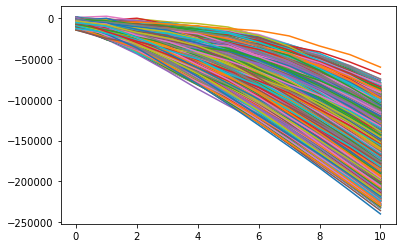

In [73]:
# Gross Income Simulator
simulations=10000
Periods=list(range(0,11))
rentas=[]
NPV_Apartments_Cum_Sum=[]
inflation=0.02
#Bi-weekly Morgage
Mortgage_Payment=int(loan.monthly_payment)
# Gross Income correcting for a 2% Inflation
for j in range(simulations):
    Rent=[45000]
    rent_growth=np.random.normal(0.04, 0.01, 10)
    Vacancy_correction=[0,0.0416,0.0833,0.1248,0.1666,0.208,0.2496]
    Op_Costs_Percentage=np.random.normal(0.30, 0.05, 11)
    Operational_Costs_List=[]
    NPV_Apartments=[]
    #Calculating Gross Rents and Vacancy Protection
    for i in range(0,10):
        Vacancy_choice=random.choices(Vacancy_correction,weights=(50, 10, 10, 10,10,5,5), k=1)
        Next_Rent=(Rent[-1]*(1+rent_growth[i])*(1-Vacancy_choice[0])/(1+inflation)**(i+1))
        Rent.append(Next_Rent)
    #Estimating Operational Expenses
    for i in range(0,len(Rent)):
        Operational_Costs=Rent[i]*Op_Costs_Percentage[i]
        Operational_Costs_List.append(Operational_Costs)
    #Calculating NOI
    for i in range(0,len(Rent)):
        NPV_Apartments.append(Rent[i] -  Operational_Costs_List[i]-(Mortgage_Payment*12)/(1+inflation)**(i))
    NPV_Apartments_Cum_Sum.append(np.cumsum(NPV_Apartments))

#Graph
for i in range(0,len(NPV_Apartments_Cum_Sum)):
    label="Line"+"_"+str(i)
    plt.plot( Periods,NPV_Apartments_Cum_Sum[i], label =label, linestyle="-")
plt.show()    